# Importing necessary Libraries!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

# Reading the CSV file and viewing the data


In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df=df.iloc[:,0:2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Visualization and Preprocessing!

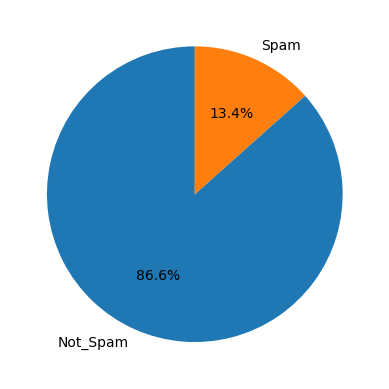

In [7]:
value_counts = df['v1'].value_counts()
plt.pie(x=value_counts,labels=['Not_Spam','Spam'], autopct='%1.1f%%', startangle=90)
plt.show()

In [8]:
#Renaming the columns to be accurate and mapping 0 to non-spam and 1 to spam sms
df.rename(columns={'v1':'class','v2':'text'},inplace=True)
df['target']=df['class'].map({'ham':0 ,'spam':1})
#Creating a copy of the dataframe which will be trained later, keeping the original one as reference
new_data=df[['target','text']]

In [9]:
#Making all the messages lowercase

new_data.iloc[:,1] = new_data.iloc[:,1].str.lower()
df.head()

#Removing all non-alphanumeric chars using Regex
new_data['text'] = new_data['text'].replace(r'[^a-zA-Z0-9\s]', '', regex=True)


In [10]:
#Searching for duplicate rows and removing them
new_data.duplicated().sum()

431

In [11]:
new_data.drop_duplicates(inplace=True)
new_data.head()

,target,text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


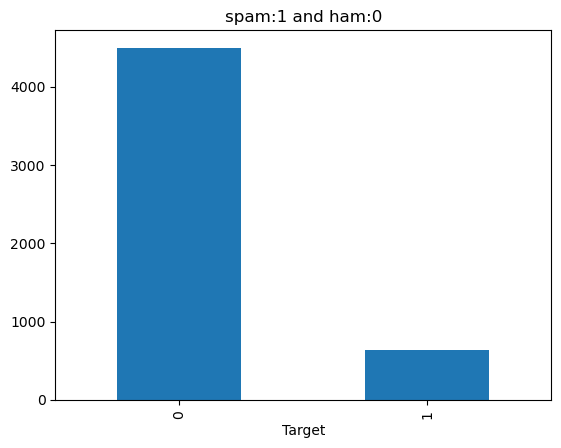

In [12]:
#Some Data Visualization
new_data['target'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.title('spam:1 and ham:0')
plt.show()

* Observation: Data is imbalanced!

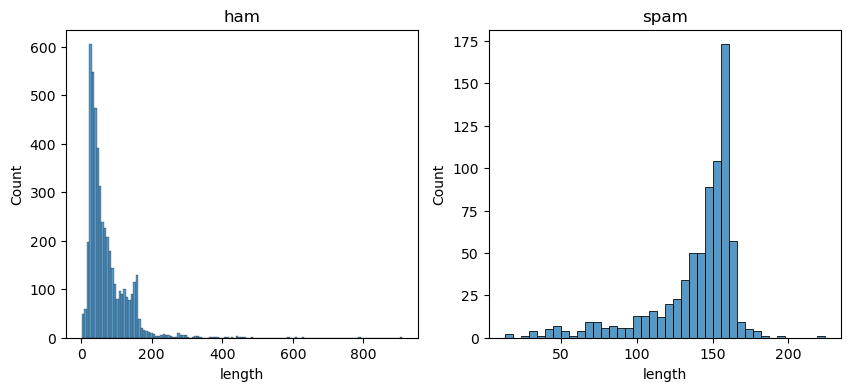

In [13]:
#Finding out the relationship of length and spam/not-spam  sms
df['length'] = df['text'].apply(len)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('ham')
sns.histplot(df[df['target']==0]['length'])
plt.subplot(1,2,2)
plt.title('spam')
sns.histplot(df[df['target']==1]['length'])
plt.show()

* Interesting observation that, spam messages are usually longer in length compared to ham/non-spam messages

In [14]:
new_data

,target,text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
covec= CountVectorizer()
tfidf = TfidfVectorizer(max_features = 2500)

In [16]:
X = tfidf.fit_transform(new_data['text']).toarray()
y = new_data['target'].values

In [17]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(X,y,test_size=0.2, random_state = 21)

In [18]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [19]:
print('Gaussian Naive Bayes')
GNB.fit(features_train, labels_train)
label_pred1 = GNB.predict(features_test)
print(accuracy_score(labels_test, label_pred1),'--- Accuracy')
print(precision_score(labels_test, label_pred1),'--- Precision')
print("*"*25)

print('Multinomial Naive Bayes')
MNB.fit(features_train, labels_train)
label_pred2 = MNB.predict(features_test)
print(accuracy_score(labels_test, label_pred2),'--- Accuracy')
print(precision_score(labels_test, label_pred2),'--- Precision')
print("*"*25)

print('Bernoulli Naive Bayes')
BNB.fit(features_train, labels_train)
label_pred3 = BNB.predict(features_test)
print(accuracy_score(labels_test, label_pred3),'--- Accuracy')
print(precision_score(labels_test, label_pred3),'--- Precision')
print("*"*25)

Gaussian Naive Bayes
0.8707482993197279 --- Accuracy
0.5020746887966805 --- Precision
*************************
Multinomial Naive Bayes
0.9689018464528668 --- Accuracy
0.9811320754716981 --- Precision
*************************
Bernoulli Naive Bayes
0.9805636540330418 --- Accuracy
0.975 --- Precision
*************************


## **Trying other Models out**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [22]:
clfs = {
    'ETC': etc,
    'SVC' : svc, 
    'NB': mnb,
    'KN' : knc,
    'DT': dtc,
    'BgC': bc,
    'LR': lrc,  
    'AdaBoost': abc,
    'RF': rfc, 
    'GBDT':gbdt
        }

In [23]:
def train_classifier(clf,features_test,labels_train,features_train,labels_test):
    clf.fit(features_train,labels_train)
    y_pred = clf.predict(features_test)
    accuracy = accuracy_score(labels_test,y_pred)
    precision = precision_score(labels_test,y_pred)
    
    return accuracy,precision

In [24]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, features_test,labels_train,features_train,labels_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,ETC,0.976676,1.000000
3,KN,0.912536,1.000000
8,RF,0.974733,1.000000
9,GBDT,0.966958,0.990196
1,SVC,0.977648,0.982609
2,NB,0.968902,0.981132
4,DT,0.951409,0.937500
5,BgC,0.970845,0.933333
6,LR,0.958212,0.933333
7,AdaBoost,0.968902,0.932203


* We have observed that the K-Nearest Neighbors (KNeighbors), Extra Trees Classifier (ETC), and rfc(random forest) algorithms consistently yield high scores and demonstrate superior precision in our machine learning experiments. To harness the strengths of these individual classifiers, we intend to explore ensemble techniques, specifically the use of a voting algorithm, to further enhance predictive performance.

**what is voting algorithm**

* In machine learning, a "voting algorithm" refers to an ensemble learning technique where multiple individual machine learning models are combined to make predictions or decisions. The idea behind a voting algorithm is to leverage the diversity of these individual models to improve the overall predictive accuracy and reliability

In [25]:
#voting classifier
knc = KNeighborsClassifier()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [26]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('knc',knc),('etc',etc),('rfc',rfc)])

In [27]:
voting.fit(features_test,labels_test)

VotingClassifier(estimators=[('knc', KNeighborsClassifier()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))])

In [28]:
y_pred = voting.predict(features_test)
print("Accuracy",accuracy_score(labels_test,y_pred))
print("Precision",precision_score(labels_test,y_pred))

Accuracy 0.9980563654033042
Precision 1.0


*As we can see, our model has improved accuracy upto 99.8% with 100% precision!*